In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
# [{'name': 'id',
#   'type': INTEGER(),
#   'nullable': False,
#   'default': None,
#   'autoincrement': 'auto',
#   'primary_key': 1},
#  {'name': 'station',
#   'type': TEXT(),
#   'nullable': True,
#   'default': None,
#   'autoincrement': 'auto',
#   'primary_key': 0},
#  {'name': 'date',
#   'type': TEXT(),
#   'nullable': True,
#   'default': None,
#   'autoincrement': 'auto',
#   'primary_key': 0},
#  {'name': 'prcp',
#   'type': FLOAT(),
#   'nullable': True,
#   'default': None,
#   'autoincrement': 'auto',
#   'primary_key': 0},
#  {'name': 'tobs',
#   'type': FLOAT(),
#   'nullable': True,
#   'default': None,
#   'autoincrement': 'auto',
#   'primary_key': 0}]

In [11]:
inspector = inspect(engine)
inspector.get_columns('Measurement')

[{'name': 'id',
  'type': INTEGER(),
  'nullable': False,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 1},
 {'name': 'station',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'date',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'prcp',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'tobs',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0}]

In [12]:
# measurement = [measurement.id, measurement.station, measurement.date, measurement.prcp, measurement.tobs]
Measurement_df = pd.DataFrame(session.query(Measurement.id, 
                           Measurement.station, 
                           Measurement.date, 
                           Measurement.prcp, 
                           Measurement.tobs).all())
Station_df = pd.DataFrame(session.query(Station.id,
                                        Station.station,
                                        Station.name,
                                        Station.latitude,
                                        Station.longitude,
                                        Station.elevation).all())
Station_df


,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6
5,6,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
6,7,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
7,8,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9
8,9,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4


In [13]:
Measurement_df.tail()

,id,station,date,prcp,tobs
19545,19546,USC00516128,2017-08-19,0.09,71.0
19546,19547,USC00516128,2017-08-20,NaN,78.0
19547,19548,USC00516128,2017-08-21,0.56,76.0
19548,19549,USC00516128,2017-08-22,0.50,76.0
19549,19550,USC00516128,2017-08-23,0.45,76.0


# Exploratory Climate Analysis

('2017-08-23',)
2016-08-23


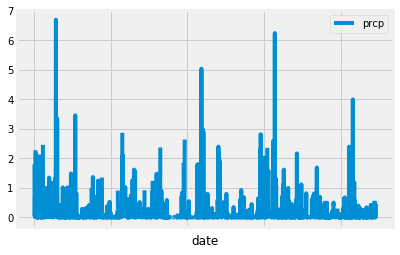

In [40]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
last_date = session.query(Measurement.date).order_by((Measurement.date).desc()).first()
print(last_date)

# Calculate the date 1 year ago from the last data point in the database
one_year_ago = dt.date(2017,8,23) - dt.timedelta(days=365)
print(one_year_ago)

# Perform a query to retrieve the data and precipitation scores
precipitation_query = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= one_year_ago).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
precipitation_df = pd.DataFrame(precipitation_query, columns=['date', 'prcp'])

# Sort the dataframe by date
precipitation_df.set_index('date',inplace=True)
precip_df_sort = precipitation_df.sort_values('date',ascending=True)
# Use Pandas Plotting with Matplotlib to plot the data
precip_df_sort.plot()


![precipitation](Images/precipitation.png)

In [17]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precipitation_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


![describe](Images/describe.png)

In [18]:
# Design a query to show how many stations are available in this dataset?
session.query(func.count(Station.station)).all()

[(9)]

In [44]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).group_by(
    Measurement.station).order_by(
    func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [45]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
session.query(func.max(Measurement.tobs), func.min(Measurement.tobs), func.avg(Measurement.tobs)).filter(
        (session.query(Measurement.station, func.count(Measurement.station))
        .group_by(Measurement.station)
        .order_by(func.count(Measurement.station)
        .desc()).first()).station == Measurement.station).all()

[(85.0, 54.0, 71.66378066378067)]

In [47]:
session.query(Measurement.station,func.count(Measurement.station)).group_by(
    Measurement.station).order_by(
    func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

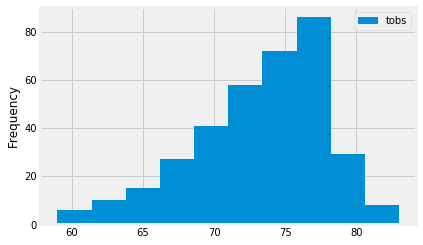

In [69]:
# Choose the station with the highest number of temperature observations.
session.query(Measurement.station,func.count(Measurement.station)).group_by(
    Measurement.station).order_by(
    func.count(Measurement.station).desc()).first()
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_query = session.query(Measurement.date,Measurement.tobs).filter(
        (session.query(Measurement.station,func.count(Measurement.station)).group_by(
        Measurement.station).order_by(func.count(Measurement.station).desc()).first()).station == 
        Measurement.station).filter(Measurement.date >= one_year_ago).all()
temp_df = pd.DataFrame(temp_query, columns = ['date','tobs'])
temp_df.set_index('date')
temp_df_sort = temp_df.sort_values('date',ascending=True)

temp_df_sort.plot(kind='hist')

![precipitation](Images/station-histogram.png)

In [70]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [74]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
trip_start = dt.date(2018,8,6)
trip_end = dt.date(2018,8,15)
last_year = dt.timedelta(365)
temp_last_year = (calc_temps((trip_start-last_year), (trip_end-last_year)))
temp_last_year

[(70.0, 79.07142857142857, 84.0)]

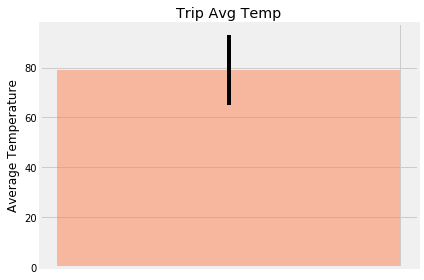

In [127]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
plt.bar([""],temp_last_year[0][1], yerr=(temp_last_year[0][2]-temp_last_year[0][0]),alpha=.5, width=(-.1), align="edge",color="coral")
plt.title("Trip Avg Temp")
plt.ylabel("Average Temperature")
plt.tight_layout()

In [140]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

session.query(Measurement.station,
              Station.name,
              Station.latitude,
              Station.longitude,
              Station.elevation,
              func.sum(Measurement.prcp)).filter(
                Measurement.station==Station.station).filter(
                Measurement.date>=(trip_start-last_year)).filter(
                Measurement.date<=(trip_end-last_year)).group_by(
                Measurement.station).order_by(
                func.sum(Measurement.prcp).desc()).all()

[('USC00516128',
  'MANOA LYON ARBO 785.2, HI US',
  21.3331,
  -157.8025,
  152.4,
  1.3900000000000001),
 ('USC00519281',
  'WAIHEE 837.5, HI US',
  21.45167,
  -157.84888999999998,
  32.9,
  0.32),
 ('USC00519523',
  'WAIMANALO EXPERIMENTAL FARM, HI US',
  21.33556,
  -157.71139,
  19.5,
  0.14),
 ('USC00514830',
  'KUALOA RANCH HEADQUARTERS 886.9, HI US',
  21.5213,
  -157.8374,
  7.0,
  0.11),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 0.02)]

## Optional Challenge Assignment

In [27]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [28]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [29]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [30]:
# Plot the daily normals as an area plot with `stacked=False`
